In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
all_data = [train,test]

In [ ]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
print (train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [ ]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


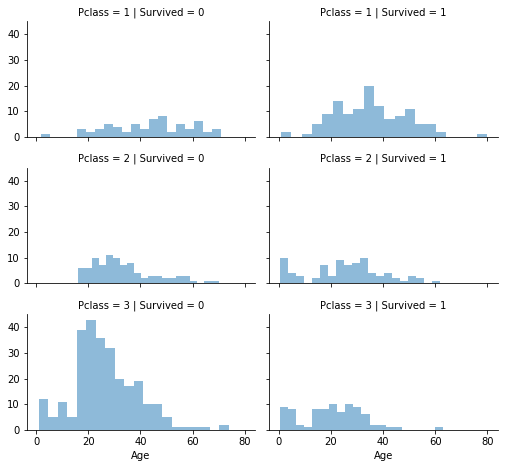

In [ ]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)
all_data = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


In [ ]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
all_data = [train, test]
print('Shape After drop: ',train.shape)

Shape After drop:  (891, 8)


In [ ]:
for dataset in all_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,8.0500,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
mean=train['Age'].mean()
train['Age'].fillna(value=mean,inplace=True)
test['Age'].fillna(value=mean,inplace=True)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
train['Age_group'] = pd.cut(train['Age'], 5)
#train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean().sort_values(by='Age_group', ascending=True)

test['Age_group'] = pd.cut(train['Age'], 5)
print(test[['Age_group']])
all_data = [train, test]

            Age_group
0    (16.336, 32.252]
1    (32.252, 48.168]
2    (16.336, 32.252]
3    (32.252, 48.168]
4    (32.252, 48.168]
..                ...
413  (16.336, 32.252]
414  (32.252, 48.168]
415  (16.336, 32.252]
416  (32.252, 48.168]
417  (16.336, 32.252]

[418 rows x 1 columns]


In [ ]:
for dataset in all_data:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,S,"(16.336, 32.252]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,C,"(32.252, 48.168]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,S,"(16.336, 32.252]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,S,"(32.252, 48.168]"
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,S,"(32.252, 48.168]"


In [ ]:
train = train.drop(['Age_group'], axis=1)
test = test.drop(['Age_group'], axis=1)
all_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",1,1.0,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,1.0,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,1.0,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",1,1.0,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",1,1.0,7.75,Q


In [ ]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')


In [ ]:
test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
for dataset in all_data:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,2.0,8.0500,0


In [ ]:
train = train.drop(['Fare'], axis=1)
test = test.drop(['Fare'], axis=1)
all_data = [train,test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2.0,0
4,5,0,3,"Allen, Mr. William Henry",1,2.0,0


In [ ]:
train.drop(['Name'],axis=1,inplace=True)
test = test.drop(['Name'], axis=1)
all_data = [train,test]
#train.head()
test.head()

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,1,2.0,2
1,893,3,0,2.0,0
2,894,2,1,3.0,2
3,895,3,1,1.0,0
4,896,3,0,1.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
# To scale data
scaler.fit_transform(train)
scaler.fit_transform(test)


array([[-1.72791209,  0.87348191,  0.75592895,  0.07599953,  2.24316522],
       [-1.71962474,  0.87348191, -1.32287566,  0.07599953, -0.6778412 ],
       [-1.71133739, -0.31581919,  0.75592895,  0.27963931,  2.24316522],
       ...,
       [ 1.71133739,  0.87348191,  0.75592895,  0.07599953, -0.6778412 ],
       [ 1.71962474,  0.87348191,  0.75592895, -0.12764024, -0.6778412 ],
       [ 1.72791209,  0.87348191,  0.75592895, -0.12764024,  0.78266201]])

In [ ]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Embarked     418 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 16.5 KB


In [ ]:
X_train=X_train.astype(int)
X_train.info()
X_test=X_test.astype(int)
#X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Age          891 non-null    int64
 4   Embarked     891 non-null    int64
dtypes: int64(5)
memory usage: 34.9 KB


In [ ]:
random_forest= RandomForestClassifier(n_estimators=100,
                             max_features='auto',
                             criterion='entropy',
                             max_depth=10)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

93.15 %


In [ ]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived":  Y_prediction
    })

submission.to_csv('submission.csv', index=False)